In [5]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scanpy.external as sce
import sys
import harmonypy as hm

# Use random module
import random 
random.seed(10)
print(random.random()) 


0.5714025946899135


In [6]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')
sns.set_style("ticks")

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.21.5 scipy==1.7.3 pandas==1.0.1 scikit-learn==1.1.2 statsmodels==0.13.2 python-igraph==0.9.11 pynndescent==0.5.7


In [3]:
adata1 = sc.read_h5ad('mouse_atlas_before_concet.h5ad')
adata2 = sc.read_h5ad("rpe_qc_before_merging.h5ad")

In [4]:
adata1.obs

,majorclass,batch,total_counts,n_genes_by_counts,n_genes
MouseACS3_GCGCGATGTCATATGC-1,AC,mouse_atlas,2511.763428,3832,3832
10x_retina0401CD73Nv3_TCACATTGTGAAGCGT-1,Cone,mouse_atlas,2123.445557,2429,2429
CtPtenNoCreCD90R1_TCGTACCCACCCTATC-1,RGC,mouse_atlas,2510.355225,4353,4353
10x_retina0315CD73Nv2_ATCATCTAGAAGATTC-1,BC,mouse_atlas,1794.582764,1473,1473
Retina_3_GCTCCTATCGGAAATA-1,AC,mouse_atlas,1903.602905,1466,1466
...,...,...,...,...,...
rgc_T9_MPTK_3-GCAGCTGGTATGACAA-1,RGC,mouse_atlas,1943.220581,1843,1843
10x_retina_WT_4M_2_CCTAAGACACTTGGGC-1,MG,mouse_atlas,2168.578125,3382,3382
10x_Retina0423Cd73N_CTACCCAAGGATTCCT-1,BC,mouse_atlas,2238.854248,3778,3778
Bipolar6_GCGCGAGAGAAT,BC,mouse_atlas,2006.513306,1688,1688


In [5]:
adata1.obs = adata1.obs.rename(columns={'majorclass': 'cell_type'})

In [6]:
adata1.obs['cell_type']

MouseACS3_GCGCGATGTCATATGC-1                  AC
10x_retina0401CD73Nv3_TCACATTGTGAAGCGT-1    Cone
CtPtenNoCreCD90R1_TCGTACCCACCCTATC-1         RGC
10x_retina0315CD73Nv2_ATCATCTAGAAGATTC-1      BC
Retina_3_GCTCCTATCGGAAATA-1                   AC
                                            ... 
rgc_T9_MPTK_3-GCAGCTGGTATGACAA-1             RGC
10x_retina_WT_4M_2_CCTAAGACACTTGGGC-1         MG
10x_Retina0423Cd73N_CTACCCAAGGATTCCT-1        BC
Bipolar6_GCGCGAGAGAAT                         BC
MouseACS3_CCTTCGACATGCTAGT-1                  AC
Name: cell_type, Length: 68342, dtype: category
Categories (12, object): [AC, Astrocyte, BC, Cone, ..., Pericyte, RGC, RPE, Rod]

In [7]:
adata2.obs['cell_type']

AAACCTGAGCAAATCA-1         Melano
AAACCTGAGCTAAACA-1      Perycytes
AAACCTGAGCTCCTCT-1    Mesenchymal
AAACCTGAGGTAAACT-1    Mesenchymal
AAACCTGAGTCTCCTC-1    Mesenchymal
                         ...     
TTTGTCATCAGCGATT-1      Perycytes
TTTGTCATCGCGCCAA-1      Perycytes
TTTGTCATCGGAAACG-1    Mesenchymal
TTTGTCATCTTGACGA-1    Mesenchymal
TTTGTCATCTTGCCGT-1    Mesenchymal
Name: cell_type, Length: 15167, dtype: category
Categories (8, object): [Endothelial, Macrophages, Melano, Mesenchymal, NK, Perycytes, RPE, Schwann]

In [8]:
# Rename "Pericite" to "Pericyte" in the cell_type column
adata2.obs['cell_type'] = adata2.obs['cell_type'].replace({'Perycytes': 'Pericyte'})

# Verify the changes
print(adata2.obs['cell_type'].unique())


['Melano' 'Pericyte' 'Mesenchymal' 'NK' 'Endothelial' 'Macrophages' 'RPE'
 'Schwann']


In [9]:

sc.pp.normalize_total(adata1, target_sum=1e4)  # Normalize counts to 10,000 per cell
sc.pp.log1p(adata1)  # Log-transform the data



sc.pp.normalize_total(adata2, target_sum=1e4)  # Normalize counts to 10,000 per cell
sc.pp.log1p(adata2)  # Log-transform the data

# Step 4: Concatenate datasets
# Automatically aligns datasets based on shared genes
adata = adata1.concatenate(adata2, batch_key="batch", batch_categories=["RPE", "mouse_atlas"],join='outer')

normalizing counts per cell
    finished (0:00:03)
normalizing counts per cell
    finished (0:00:00)


/home/julia/miniconda3/envs/scfates_2/lib/python3.8/site-packages/anndata/_core/merge.py:942: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  warn(
/home/julia/miniconda3/envs/scfates_2/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [10]:
adata

AnnData object with n_obs × n_vars = 83509 × 24463
    obs: 'cell_type', 'batch', 'total_counts', 'n_genes_by_counts', 'n_genes'
    var: 'gene_symbols-RPE', 'feature_is_filtered-RPE', 'feature_name-RPE', 'feature_reference-RPE', 'feature_biotype-RPE', 'feature_length-RPE', 'feature_type-RPE', 'mt-RPE', 'n_cells_by_counts-RPE', 'mean_counts-RPE', 'pct_dropout_by_counts-RPE', 'total_counts-RPE', 'n_cells-RPE', 'mt-mouse_atlas', 'n_cells_by_counts-mouse_atlas', 'mean_counts-mouse_atlas', 'pct_dropout_by_counts-mouse_atlas', 'total_counts-mouse_atlas', 'n_cells-mouse_atlas', 'gene_ids-mouse_atlas', 'log1p_mean_counts-mouse_atlas', 'log1p_total_counts-mouse_atlas'
    obsm: 'X_scVI', 'X_umap'
    layers: 'counts'

In [11]:
adata.var=adata.var.drop(columns = 
[ 
  'gene_symbols-RPE', 'feature_is_filtered-RPE', 'feature_name-RPE', 'feature_reference-RPE', 'feature_biotype-RPE', 'feature_length-RPE', 'feature_type-RPE', 'mt-RPE', 'n_cells_by_counts-RPE', 'mean_counts-RPE', 'pct_dropout_by_counts-RPE', 'total_counts-RPE', 'n_cells-RPE', 'mt-mouse_atlas', 'n_cells_by_counts-mouse_atlas', 'mean_counts-mouse_atlas', 'pct_dropout_by_counts-mouse_atlas', 'total_counts-mouse_atlas', 'n_cells-mouse_atlas', 'gene_ids-mouse_atlas', 'log1p_mean_counts-mouse_atlas', 'log1p_total_counts-mouse_atlas'  
    
], axis = 1) 

In [12]:
# Step 5: Identify highly variable genes
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)# Select top 2000 highly variable genes
adata.raw = adata
adata = adata[:, adata.var.highly_variable]  # Keep only highly variable genes

# Step 6: Scale the data and perform PCA
sc.pp.scale(adata, max_value=10)  # Scale data to unit variance and zero mean
sc.tl.pca(adata, svd_solver="arpack", n_comps=60)  # Perform PCA


If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:37)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/home/julia/miniconda3/envs/scfates_2/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
computing PCA
    on highly variable genes
    with n_comps=60
    finished (0:00:18)


In [ ]:
adata.write_h5ad("merging_before_harmony.h5ad")

In [7]:
adata1 = sc.read_h5ad("merging_before_harmony.h5ad")

In [8]:
adata_combined=adata1.copy()

2025-03-19 10:16:50,102 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-03-19 10:19:51,251 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-03-19 10:19:53,438 - harmonypy - INFO - Iteration 1 of 3
2025-03-19 10:22:18,567 - harmonypy - INFO - Iteration 2 of 3
2025-03-19 10:24:22,887 - harmonypy - INFO - Converged after 2 iterations


computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:02:36)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:05:21)
running Leiden clustering
    finished: found 45 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:37)


/home/julia/miniconda3/envs/scfates_2/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


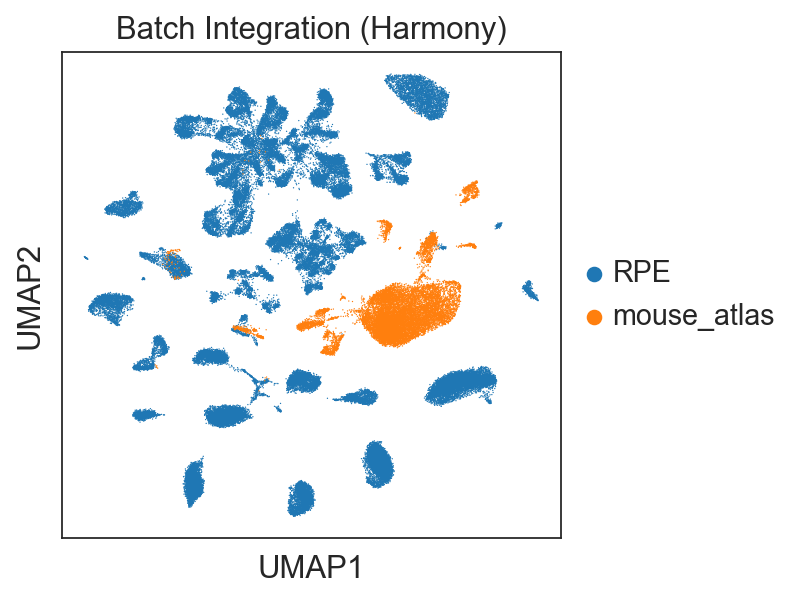

In [9]:
# Step 7: Run Harmony for batch correction
harmony_out = hm.run_harmony(
    adata_combined.obsm["X_pca"], 
    adata_combined.obs, 
    "batch", 
    theta=3.0,           # Increase theta to reduce integration strength
   # lambda=0.5,      # Reduce lambda for weaker regularization
    max_iter_harmony=3,  # Limit number of iterations
   # epsilon_cluster=1e-3 # Loosen clustering convergence
)

adata_combined.obsm["X_pca_harmony"] = harmony_out.Z_corr.T  # Save Harmony-adjusted embeddings

# Step 8: Compute neighbors and UMAP using Harmony-adjusted PCA
sc.pp.neighbors(adata_combined, use_rep="X_pca_harmony",   n_pcs=50,
    n_neighbors=50)  # Use Harmony embeddings for neighbor graph
sc.tl.umap(adata_combined)  # Compute UMAP for visualization
sc.tl.leiden(adata_combined)

# Step 9: Visualization
# Plot UMAP colored by batch and other relevant annotations (e.g., cell type, clusters)
sc.pl.umap(adata_combined, color=["batch"], title="Batch Integration (Harmony)")


In [16]:
sc.settings.verbosity = 1
sns.set(font_scale=1)
sc.settings.set_figure_params(dpi=150)
sns.set_style("ticks")

from matplotlib import cm
from matplotlib.colors import ListedColormap

cm_color = cm.get_cmap("Reds", 128)
cm_grey = cm.get_cmap("Greys", 128)

Reds = ListedColormap(np.vstack((
    cm_grey(np.linspace(0.2, 0.2, 1)),
    cm_color(np.linspace(0.1, 1, 128)),
)))

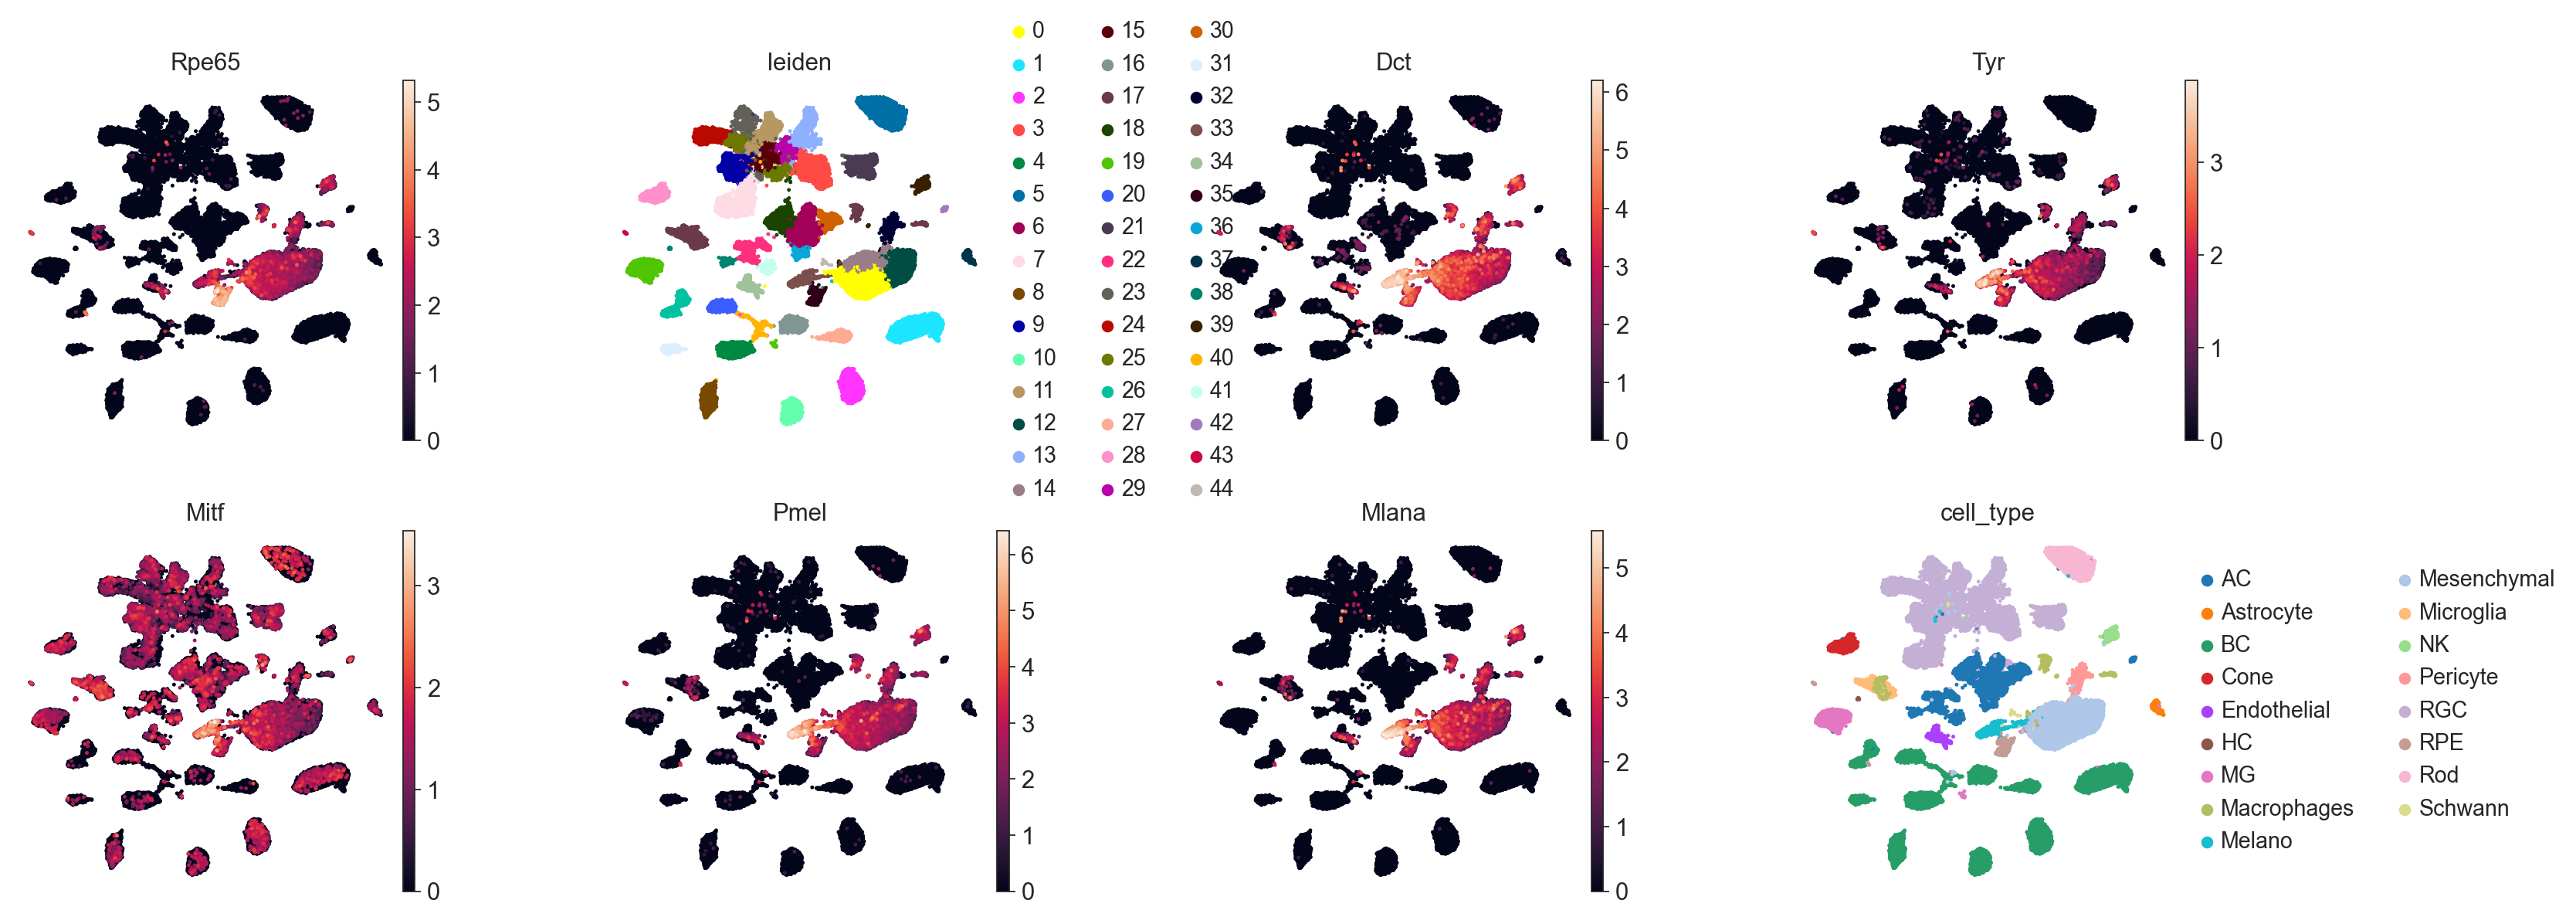

In [10]:
sc.pl.umap(adata_combined, color=["Rpe65","leiden",  "Dct", "Tyr", "Mitf", "Pmel", "Mlana", 'cell_type'],
            wspace=0.4, frameon=False, size=20)

Missing categories: set()


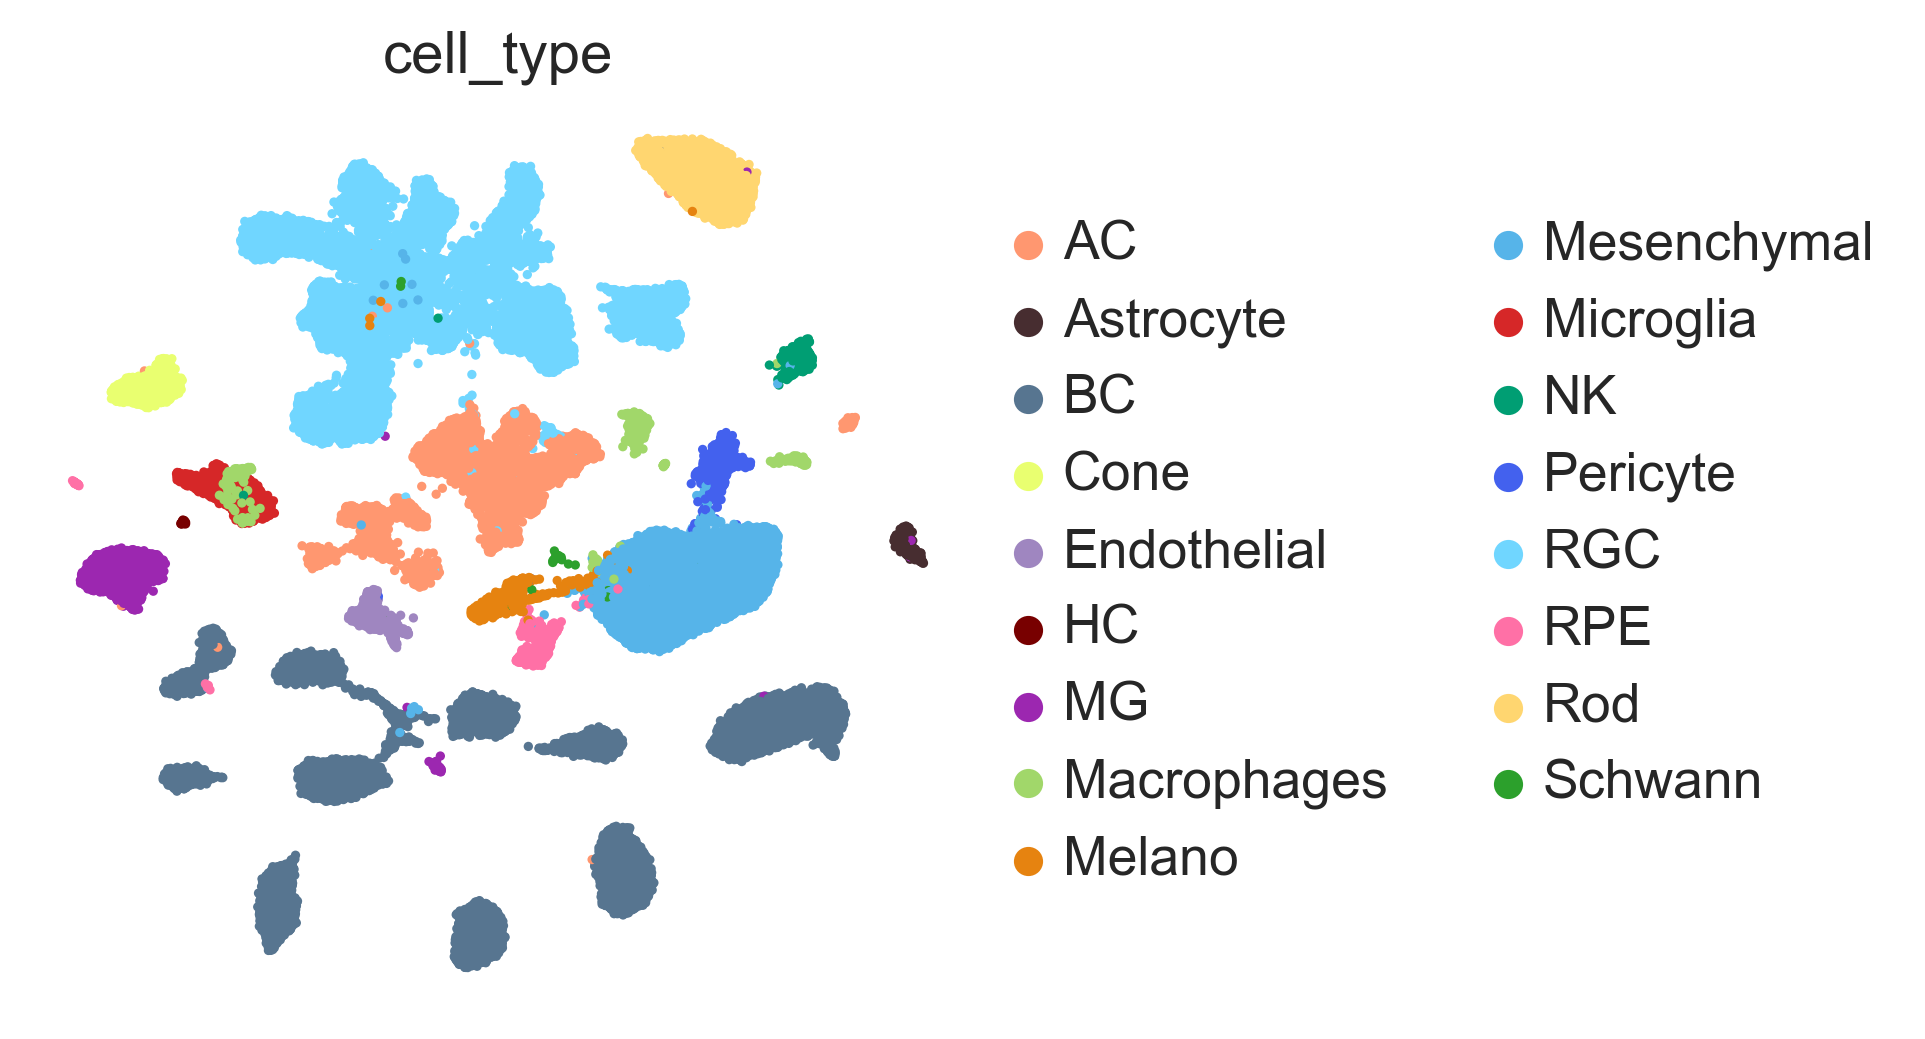

In [26]:
custom_colors = {
    "AC": "#ff9770",        
    "Astrocyte": "#472d30",  
    "BC": "#577590",        
    "Microglia": "#D62728",    
    "Endothelial": "#9f86c0",
    "HC": "#780000",        
    "MG": "#9C27B0",        
    "Cone": "#e9ff70",      
    "Pericyte": "#4361ee",   
    "RGC": "#70d6ff",       
    "RPE": "#ff70a6",       
    "Rod": "#ffd670",      

    # New cell types
    "Schwann": "#2CA02C",
    "Macrophages": "#A1D76A",  
    "Melano": "#E68310",      
    "Mesenchymal": "#56B4E9", 
    "NK": "#009E73",         
}

# Ensure cell type is categorical
adata_combined.obs["cell_type"] = adata_combined.obs["cell_type"].astype("category")

# Check for missing categories
missing_categories = set(adata_combined.obs["cell_type"].cat.categories) - set(custom_colors.keys())
print("Missing categories:", missing_categories)

# Assign colors to AnnData object
adata_combined.uns["cell_type_colors"] = {c: custom_colors[c] for c in adata_combined.obs["cell_type"].cat.categories}

# Plot with corrected color mapping
sc.pl.umap(adata_combined, color="cell_type", palette=custom_colors, frameon=False, size=20, save='merged.pdf')


In [56]:
adata_combined.write_h5ad("merge_harmony_umap.h5ad")

# Cassiopea_prep

In [27]:
adata_hvg=adata_combined.copy()

In [28]:
adata_hvg=adata_hvg.raw.to_adata()

In [29]:
adata_hvg

AnnData object with n_obs × n_vars = 83509 × 24463
    obs: 'cell_type', 'batch', 'total_counts', 'n_genes_by_counts', 'n_genes', 'leiden'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'batch_colors', 'leiden_colors', 'cell_type_colors'
    obsm: 'X_scVI', 'X_umap', 'X_pca', 'X_pca_harmony'
    obsp: 'distances', 'connectivities'

In [30]:
import pandas as pd
import numpy as np
import scipy.sparse as sp

# Assuming 'adata' is your AnnData object and 'leiden' is the clustering annotation
# Create a DataFrame to store the results
cluster_gene_expression = {}

# Iterate over each cluster
for cluster in adata_hvg.obs['cell_type'].unique():
    # Subset the adata object to the current cluster
    cluster_data = adata_hvg[adata_hvg.obs['cell_type'] == cluster]
    
    # Ensure cluster_data.X is dense if it's sparse
    if sp.issparse(cluster_data.X):
        cluster_data_matrix = cluster_data.X.toarray()
    else:
        cluster_data_matrix = cluster_data.X
    
    # Calculate the fraction of cells expressing each gene
    fraction_expressing = (cluster_data_matrix > 0).sum(axis=0) / cluster_data.n_obs
    
    # Filter genes expressed in at least 10% of the cells
    genes_expressed = np.array(adata_hvg.var_names)[fraction_expressing >0]
    
    # Store the results in a dictionary
    cluster_gene_expression[cluster] = genes_expressed

# Convert the results into a readable format
cluster_gene_expression_df = pd.DataFrame(
    dict([(k, pd.Series(v)) for k, v in cluster_gene_expression.items()])
)

# Save the results to a CSV file
#cluster_gene_expression_df.to_csv("genes_expressed_in_clusters.csv", index=False)

#print("Genes expressed in at least 10% of cells for each cluster saved to 'genes_expressed_in_clusters.csv'.")


In [31]:
cluster_gene_expression_df

,AC,Cone,RGC,BC,Microglia,MG,Rod,Astrocyte,Endothelial,Pericyte,RPE,HC,Melano,Mesenchymal,NK,Macrophages,Schwann
0,0610005C13Rik,0610005C13Rik,0610005C13Rik,0610005C13Rik,0610005C13Rik,0610005C13Rik,0610005C13Rik,0610005C13Rik,0610005C13Rik,0610009B22Rik,0610005C13Rik,0610005C13Rik,0610009B22Rik,0610005C13Rik,0610009B22Rik,0610009B22Rik,0610009B22Rik
1,0610009B22Rik,0610009B22Rik,0610006L08Rik,0610006L08Rik,0610009B22Rik,0610009B22Rik,0610009B22Rik,0610009B22Rik,0610009B22Rik,0610009E02Rik,0610009B22Rik,0610009B22Rik,0610009E02Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610009E02Rik
2,0610009E02Rik,0610009E02Rik,0610009B22Rik,0610009B22Rik,0610009E02Rik,0610009E02Rik,0610009E02Rik,0610009E02Rik,0610009E02Rik,0610009L18Rik,0610009E02Rik,0610009E02Rik,0610009L18Rik,0610009E02Rik,0610009L18Rik,0610010F05Rik,0610009L18Rik
3,0610009L18Rik,0610009L18Rik,0610009E02Rik,0610009E02Rik,0610009L18Rik,0610009L18Rik,0610009L18Rik,0610009L18Rik,0610009L18Rik,0610010F05Rik,0610009L18Rik,0610009L18Rik,0610010F05Rik,0610009L18Rik,0610010F05Rik,0610010K14Rik,0610010F05Rik
4,0610010F05Rik,0610010F05Rik,0610009L18Rik,0610009L18Rik,0610010F05Rik,0610010F05Rik,0610010F05Rik,0610010F05Rik,0610010F05Rik,0610010K14Rik,0610010F05Rik,0610010F05Rik,0610010K14Rik,0610010F05Rik,0610010K14Rik,0610012G03Rik,0610010K14Rik
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23833,NaN,NaN,mt-Nd3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23834,NaN,NaN,mt-Nd4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23835,NaN,NaN,mt-Nd4l,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23836,NaN,NaN,mt-Nd5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
with open('/home/julia/data/Scenic_database/Mouse/TF/allTFs_mm.txt', 'r') as file:
    list_tf = []
    for line in file.read().split('\n'):
            
                list_tf.append(line)
                
#print(list_tf)

In [34]:
import pandas as pd

# Ensure that list_tf contains unique transcription factors
set_tf = set(list_tf)

# Convert each cluster's gene list into a set for faster lookup
cluster_gene_sets = {col: set(cluster_gene_expression_df[col].dropna()) for col in cluster_gene_expression_df.columns}

# Create an empty DataFrame with transcription factors as rows and clusters as columns
tf_df = pd.DataFrame(False, index=list_tf, columns=cluster_gene_expression_df.columns, dtype=bool)

# Populate the DataFrame with True/False based on gene presence
for cluster, gene_set in cluster_gene_sets.items():
    tf_df[cluster] = [gene in gene_set for gene in list_tf]



In [35]:
tf_df.head(200)

,AC,Cone,RGC,BC,Microglia,MG,Rod,Astrocyte,Endothelial,Pericyte,RPE,HC,Melano,Mesenchymal,NK,Macrophages,Schwann
Bcl6b,True,True,True,True,True,False,False,False,True,True,False,False,False,True,True,True,True
Zscan26,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
Mtf1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
Klf9,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
Zic5,True,True,True,True,True,True,True,True,True,True,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pknox2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
Gsx2,False,False,True,False,False,False,False,False,True,True,True,False,True,True,True,True,True
Hoxc9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Alx1,False,False,False,False,False,False,False,False,True,True,True,False,True,True,True,True,True


In [39]:
tf_df

,AC,Cone,RGC,BC,Microglia,MG,Rod,Astrocyte,Endothelial,Pericyte,RPE,HC,Melano,Mesenchymal,NK,Macrophages,Schwann
Bcl6b,1,1,1,1,1,0,0,0,1,1,0,0,0,1,1,1,1
Zscan26,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Mtf1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Klf9,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Zic5,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zscan4b,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Zscan4e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Zswim1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Zxdb,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [40]:
# Assuming 'tf_df' is the DataFrame with True/False values
# Convert True/False to 1/0
tf_df = tf_df.astype(int)
tf_df
# Save the resulting DataFrame to a CSV file
#tf_df.to_csv("tf_presence_as_binary.csv")

#print("DataFrame with 1/0 representation saved to 'tf_presence_as_binary.csv'.")

,AC,Cone,RGC,BC,Microglia,MG,Rod,Astrocyte,Endothelial,Pericyte,RPE,HC,Melano,Mesenchymal,NK,Macrophages,Schwann
Bcl6b,1,1,1,1,1,0,0,0,1,1,0,0,0,1,1,1,1
Zscan26,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Mtf1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Klf9,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Zic5,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zscan4b,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Zscan4e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Zswim1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Zxdb,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [41]:
# Assuming 'tf_df' is the DataFrame with 1/0 representation

# Filter rows where not all values are 0 or 1
filtered_tf_df = tf_df[(tf_df.sum(axis=1) != 0) & (tf_df.sum(axis=1) != tf_df.shape[1])]
filtered_tf_df
# Save the filtered DataFrame to a CSV file
#filtered_tf_df.to_csv("cassiopea_folders_24_12/filtered_tf_2000_hv.csv")

#print("Filtered DataFrame saved to 'filtered_tf_binary.csv'.")

,AC,Cone,RGC,BC,Microglia,MG,Rod,Astrocyte,Endothelial,Pericyte,RPE,HC,Melano,Mesenchymal,NK,Macrophages,Schwann
Bcl6b,1,1,1,1,1,0,0,0,1,1,0,0,0,1,1,1,1
Zic5,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,1,0
Egr3,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1
Tfap2c,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0
Tfap2e,1,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zfp97,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0
Zfp970,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0
Zfp973,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
Zfp975,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0


In [43]:
filtered_tf_df.to_csv("17_03_new/17_03_RPE_ATLAC_combine_harmony1.csv")

In [36]:
adata_combined.write_h5ad('P4_Final.h5ad')

In [50]:
# Assuming 'filtered_tf_df' is the DataFrame with filtered rows

# Filter rows where the number of 1's is less than 8
filtered_tf_df_less10 = filtered_tf_df[filtered_tf_df.sum(axis=1) <14]
filtered_tf_df_less10

,AC,Cone,RGC,BC,Microglia,MG,Rod,Astrocyte,Endothelial,Pericyte,RPE,HC,Melano,Mesenchymal,NK,Macrophages,Schwann
Bcl6b,1,1,1,1,1,0,0,0,1,1,0,0,0,1,1,1,1
Zic5,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,1,0
Tfap2c,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0
Tfap2e,1,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0
Ascl2,1,0,1,1,1,0,0,0,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zfp819,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0
Zfp831,1,0,1,1,1,1,0,0,1,1,0,0,0,1,1,0,0
Zfp965,1,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0
Zfp968,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0


In [51]:
filtered_tf_df_less10.to_csv("17_03_new/17_03_RPE_ATLAC_combine_harmony1_less_14.csv")